#  Correlation Matrix and Principal Component Analysis

## PCA
The following snippet will do a PCA and show the loadings, the sum of loadings, and the explained variance ratio. Principal Component Analysis (PCA) is a statistical technique which is used to reduce dimensionality of a multi-dimension dataset. In this case, the example is set with domain_585.csv file which has 4 oceanic variables: Thetao, Pr, Chl, So. The idea of a PCA is to create new variables using linear combination of these 4 variables so the dimensions are reduced, in this case from 4 to 2. This gives us 2 new components which are called Principal Components, and they explain the variance captured in the whole dataset. Explained variance ratio is the ratio that indicates how much of the total variance is captured by each PC. if PC1 is 0.70, then it means it captures 70% of the variance in the data. Note that, this doesn't mean that a specific variable is influencing the variance more. If you want this information on which variable is putting how much weight on which PC, you will look at the loadings. The loadings are coefficients of the linear combination that are defining each PC i.e it shows the contribution of each original variable (for example, thetao) to the principal component (say, PC1). 
## Correlation
There are 2 correlation analyses done here - one for the variables themselves and other one for the variables with Principal Component. The basic correlation analysis shows a pairwise correlation between all the pairs of variables in the dataset. The range is from -1 to 1 where 1 is a perfect positive correlation and 0 is no correlation. For instance, from this dataset it seems PR has no correlation with CHL. Now it doesn't necessariliy mean that when there is rainfall or inflow from rivers into the sea, the CHL does not change at all - it means that the changes are so small that they cannot be  There are numerous factors that influence these phenomenons - for instance So a correlation matrix is not the final outcome of checking relation among variables - there may be foreign influences on the variables which must be kept in mind. 
## P-values
This code calculates p-values in two key areas: correlation matrix and principal components. For the correlation matrix, it computes p-values to assess the likelihood that the observed correlations between variables are due to chance, with low p-values (typically < 0.05) indicating significant correlations. For principal components, it performs a permutation test to generate p-values for the explained variance ratios, comparing observed ratios with those from randomized data. Significant p-values here suggest that the principal components capture meaningful variance in the data. These p-values help determine the statistical significance of correlations and principal components in the dataset. 

Explained variance ratio: [0.59634988 0.23757489]
Sum of explained variance ratio: 0.8339247654117607
Correlation Matrix:
           THETAO        PR       CHL        SO
THETAO  1.000000 -0.385441 -0.798609 -0.618602
PR     -0.385441  1.000000  0.075656  0.319360
CHL    -0.798609  0.075656  1.000000  0.416225
SO     -0.618602  0.319360  0.416225  1.000000
P-values Matrix for Correlation:
                THETAO            PR            CHL             SO
THETAO   1.000000e+00  6.841484e-38  2.324579e-229  5.252005e-110
PR       6.841484e-38  1.000000e+00   1.505830e-02   6.717067e-26
CHL     2.324579e-229  1.505830e-02   1.000000e+00   1.673579e-44
SO      5.252005e-110  6.717067e-26   1.673579e-44   1.000000e+00
P-values for each principal component: [0.533 0.122]
Component Loadings:
              PC1       PC2
THETAO  0.612925  0.113535
PR     -0.314964  0.850580
CHL    -0.521639 -0.498551
SO     -0.503005  0.122762


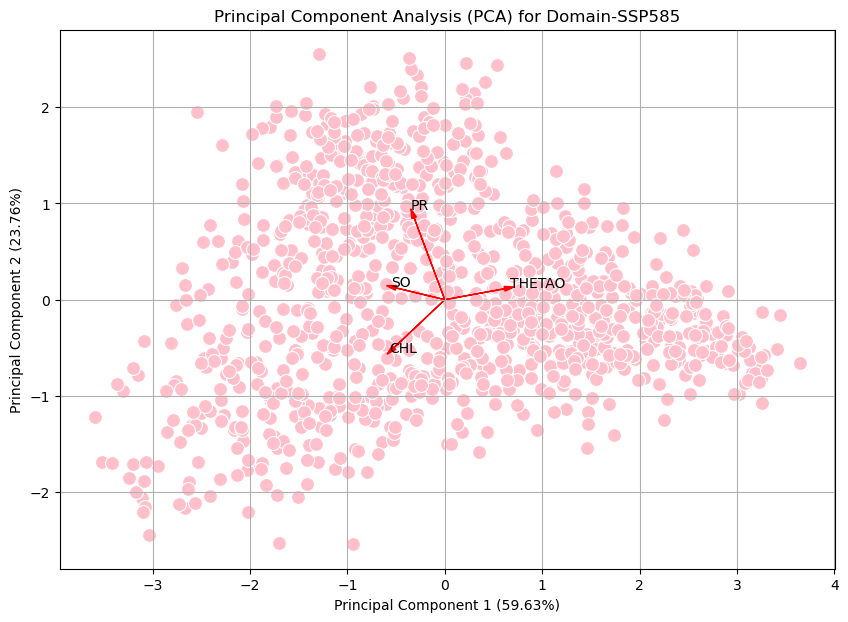

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

# Load the data
file_path = 'domain_585.csv'

base_name = file_path.rsplit('.', 1)[0]
parts = base_name.split('_')
location = parts[0].capitalize()
scenario = parts[1]
df = pd.read_csv(file_path)

# Standardizing the data (mean=0, variance=1)
data_standardized = (df - df.mean()) / df.std()

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
sum = explained_variance_ratio.sum()
print("Sum of explained variance ratio:", sum)

# Calculate p-values using permutation test
num_permutations = 1000
perm_explained_variance = np.zeros((num_permutations, 2))

for i in range(num_permutations):
    permuted_data = np.random.permutation(data_standardized)
    perm_pca = PCA(n_components=2)
    perm_pca.fit(permuted_data)
    perm_explained_variance[i, :] = perm_pca.explained_variance_ratio_

# Calculate the correlation matrix
corr_matrix = df.corr()
print("Correlation Matrix:\n", corr_matrix)

# Calculate the p-values for the correlation matrix
df_columns = df.columns
p_values_corr = pd.DataFrame(np.ones((len(df_columns), len(df_columns))), columns=df_columns, index=df_columns)
for i in range(len(df_columns)):
    for j in range(i+1, len(df_columns)):
        corr, p_val = pearsonr(df[df_columns[i]], df[df_columns[j]])
        p_values_corr.iloc[i, j] = p_val
        p_values_corr.iloc[j, i] = p_val
print("P-values Matrix for Correlation:\n", p_values_corr)

# Plotting PCA results
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(x='PC1', y='PC2', data=pca_df, s=100, edgecolor='w', color='pink')

# Compute p-values of PC
p_values = np.mean(perm_explained_variance >= explained_variance_ratio, axis=0)
print("P-values for each principal component:", p_values)

# PCA component loadings
loadings = pca.components_
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=df.columns)
print("Component Loadings:\n", loadings_df)

# Plot the PCA
plt.title(f'Principal Component Analysis (PCA) for {location}-SSP{scenario}')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.2f}%)')
components = pca.components_
for i in range(components.shape[1]):
    plt.arrow(0, 0, components[0, i], components[1, i], head_width=0.05, head_length=0.1, color='red')
    plt.text(components[0, i] * 1.1, components[1, i] * 1.1, df.columns[i], color='black')

# Save figure
plt.grid()
# plt.savefig(f'{file_path}.png', dpi=300, bbox_inches='tight')
plt.show()